# Khedoudja Rym MERAD 

Ce rendu est inspiré de mon travail en alternance => je suis sur le projet de prédiction des vente des restaurateurs 

## Import des bibliothèques 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose 

## Import de la base 

In [17]:
data = pd.read_csv("data.csv")
data.head()


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


**La base est ordonnées en dates croisssante pas besoin de manipuler l'ordre des données**

## Exploration de la base data

In [18]:

data.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


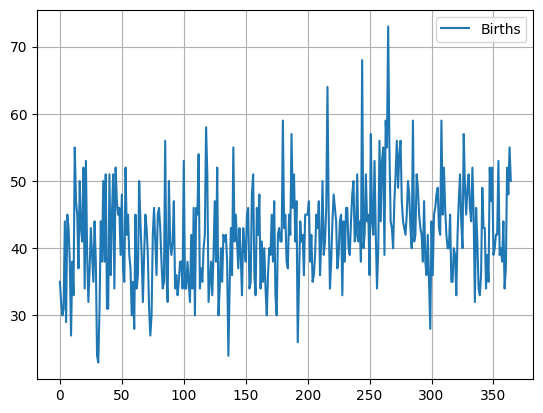

In [19]:
data.plot()
plt.grid()

## Décomposition

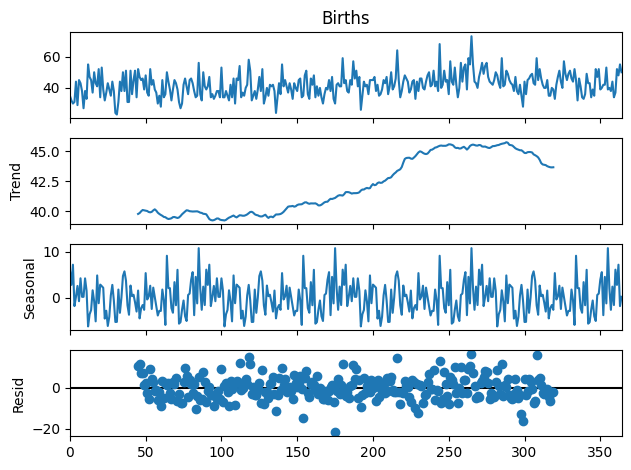

In [20]:
df = data['Births']
period = 90
res = seasonal_decompose(df, model='additive', period=period)
res.plot()
plt.show()

**On remarque une tendance haussière vers la fin de la base**

**Il n'y a pas de saisonalité apparente**

**Les données peuvent être très bruités car plus ou moins 20 naissance sur une moyenne de 41 celà représente la moitiée**

## Prédiction avec auto ARIMA

**Avant de passer à la prédiction nous devons nettoyer le bruit** 


Pour celà je propose le lissage sav_gol pour eviter les valeurs nulles 

In [22]:
from scipy.signal import savgol_filter # Import du lissage de Savitzky_Golay
from scipy import stats

data.replace(0, np.nan, inplace=True)
data["Births"] = savgol_filter(data["Births"], 7, 3) # Je garde une fenetre de lissage de 7 jours mais nous pouvons la modifier 


## Splitter les données en train test 

In [26]:
def split_data(data_long, train_size = 0.8):
    train_size = int(len(data_long) * train_size)
    train = data_long.iloc[:train_size]
    valid = data_long.iloc[train_size:]
    return train, valid

train, test = split_data(data_long=data,train_size=0.8)

In [27]:
train

,Date,Births
0,1959-01-01,34.452381
1,1959-01-02,32.261905
2,1959-01-03,31.690476
3,1959-01-04,32.571429
4,1959-01-05,35.380952
...,...,...
287,1959-10-15,47.619048
288,1959-10-16,45.571429
289,1959-10-17,48.000000
290,1959-10-18,46.952381


## Entrainement

**Je propose une prédiction à l'aide de auto_arima car il optimise automatiquement les hyperparamètres**

In [33]:
import pmdarima
from pmdarima.arima import auto_arima

model = auto_arima(data["Births"],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1713.872, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1826.114, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1789.890, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1785.242, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1824.184, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1706.912, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1786.135, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1775.839, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1710.879, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1735.867, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1712.445, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1705.634, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1784.160, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : 

## Prédictions

je prédit les 7 prochains jours

Mon modèle n'a pas besoin d'utiliser les ensembles de test et de train 

In [35]:
future_predictions = model.predict(n_periods=7)

np.floor(future_predictions)

365    44.0
366    41.0
367    41.0
368    41.0
369    42.0
370    43.0
371    43.0
dtype: float64

La fonction auto_arima teste plusieurs hyperparamètres (n,p,q) et ilest possible pour chaque teste d'extraire les performances liés à ces tests, il est possible de les tracer, quand au choix optimal il se fait automatiquement 
Il est possible d'avoir de meilleurs performances en offrant aux données un meilleur prétraitement 